In [193]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Get Continent name
import pycountry_convert as pc
import pycountry

from datetime import datetime

#Get coordinates
from geopy.geocoders import Nominatim

#For mapping
from shapely.geometry import Polygon

#Disable Warning in cell 6
pd.options.mode.chained_assignment = None

In [194]:
df = pd.read_csv('ecdc-covid-data.csv')
df.tail(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
12241,ZWE,Zimbabwe,2020-04-17,24,1,3,0,1.615,0.067,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12242,ZWE,Zimbabwe,2020-04-18,24,0,3,0,1.615,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12243,ZWE,Zimbabwe,2020-04-19,25,1,3,0,1.682,0.067,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12244,ZWE,Zimbabwe,2020-04-20,25,0,3,0,1.682,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12245,ZWE,Zimbabwe,2020-04-21,25,0,3,0,1.682,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN


In [195]:
# Change 'Bonaire Sint Eustatius and Saba'
df[df.location == 'Bonaire Sint Eustatius and Saba'].head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
1065,BES,Bonaire Sint Eustatius and Saba,2020-04-02,2,2,0,0,76.275,76.275,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1066,BES,Bonaire Sint Eustatius and Saba,2020-04-03,2,0,0,0,76.275,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1067,BES,Bonaire Sint Eustatius and Saba,2020-04-04,2,0,0,0,76.275,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1068,BES,Bonaire Sint Eustatius and Saba,2020-04-05,2,0,0,0,76.275,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1069,BES,Bonaire Sint Eustatius and Saba,2020-04-06,2,0,0,0,76.275,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [196]:
#Add continent column - this results in errors because country name differentiate
to_country_code = lambda row: pc.country_name_to_country_alpha2(row, cn_name_format="default")
try:
    country_code = df['location'].apply(to_country_code)
except:
    NameError

In [197]:
#The stuck countries are below
stuck_countries = set()
for row in df['location']:
    try:
        pc.country_name_to_country_alpha2(row, cn_name_format="default")
    except:
        stuck_countries.add(row)
print ('stuck_countries: {}'.format(stuck_countries))

stuck_alpha2 = set()
for row in df['location']:
    try:
        continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(row))]
    except:
        stuck_alpha2.add(row)
print ('stuck_alpha2: {}'.format(stuck_alpha2))

stuck_countries: {'Vatican', 'Faeroe Islands', 'Bonaire Sint Eustatius and Saba', 'Timor', 'Curacao', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Kosovo'}
stuck_alpha2: {'Luxembourg', 'Isle of Man', 'China', 'Guam', 'Moldova', 'Afghanistan', 'United Kingdom', 'Gibraltar', 'Laos', 'Paraguay', 'Bangladesh', 'El Salvador', 'Uruguay', 'Zimbabwe', 'Curacao', 'Puerto Rico', 'Bosnia and Herzegovina', 'Bolivia', 'United Arab Emirates', 'Guinea', 'Djibouti', 'Denmark', 'Seychelles', 'Belize', 'Aruba', 'Antigua and Barbuda', 'San Marino', 'Vietnam', 'Ghana', 'Mexico', 'Turkey', 'Cyprus', 'Botswana', 'Somalia', 'Mongolia', 'Australia', 'Barbados', 'Cameroon', 'Turks and Caicos Islands', 'Guinea-Bissau', 'Switzerland', 'Macedonia', 'Guatemala', 'Jersey', 'Sri Lanka', 'Azerbaijan', 'Russia', 'Haiti', 'Saudi Arabia', 'Central African Republic', 'Saint Vincent and the Grenadines', 'Germany', 'Peru', 'Fiji', 'Montenegro', 'Italy', 'Portugal', 'Cambodia', 'Thailand', 'Belgium', 'Benin', 'Cayman I

In [198]:
#Rename some countries to work

#Côte d'Ivoire
location_ivory_coast = df.location[df.location == "Cote d'Ivoire"]
df.location[df.location == "Cote d'Ivoire"] = location_ivory_coast.replace(to_replace = "Cote d'Ivoire",value="Côte d'Ivoire")

#Faroe Islands
location_faroe_islands = df.location[df.location == "Faeroe Islands"]
df.location[df.location == "Faeroe Islands"] = location_faroe_islands.replace(to_replace = "Faeroe Islands",value="Faroe Islands")

#Democratic Republic of the Congo
location_drc = df.location[df.location == "Democratic Republic of Congo"]
df.location[df.location == "Democratic Republic of Congo"] = location_drc.replace(to_replace = "Democratic Republic of Congo",value="Democratic Republic of the Congo")

#Curaçao
location_curacao = df.location[df.location == "Curacao"]
df.location[df.location == "Curacao"] = location_curacao.replace(to_replace = "Curacao",value="Curaçao")


#Reset Timor to Timor-Leste (proper name)
location_timor = df.location[df.location == "Timor"]
df.location[df.location == "Timor"] = location_timor.replace(to_replace = "Timor",value="Timor-Leste")

In [199]:
def create_continent():
    
    '''
    Input: None
    Output: Complete series with continent names
    '''
    #Initializes new Series
    conti_column = pd.Series([],dtype='object')

    continents = {
        'NA': 'North America',
        'SA': 'South America', 
        'AS': 'Asia',
        'OC': 'Australia',
        'AF': 'Africa',
        'EU': 'Europe'}
    
    #Checks which countries have problems using when converting from the 2 country
    #code to continent name, adds these countries to a set
    stuck_alpha2 = set()
    for row in df['location']:
        try:
            continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(row))]
        except:
            stuck_alpha2.add(row)
    
    #Fills in continent name for countries without converting problems and leaves the
    #others as np.nan
    for index,country in enumerate(df.location):
        if country in set(df.location[~df['location'].isin(list(stuck_alpha2))]):
            conti_column.loc[index] = continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))]
        else:
            conti_column.loc[index] = np.nan

    #Manually add Continent names for the stuck_alpha2 countries
    conti_column[df.location == "Bonaire Sint Eustatius and Saba"] = "North America"
    conti_column[df.location == "Vatican"] = "Europe"
    conti_column[df.location == "Sint Maarten (Dutch part)"] = "North America"
    conti_column[df.location == "Timor-Leste"] = "Asia"
    conti_column[df.location == "Kosovo"] = "Europe"
    
    return conti_column

df['continent'] = create_continent()

In [200]:
def create_alpha2():
    alpha2_column = pd.Series(dtype='object')
    
    for index, alpha3 in enumerate(df.iso_code):
        try:
            alpha2_column.loc[index] = pc.country_alpha3_to_country_alpha2(alpha3)
        #The only country that appeared to have a error converting is Kosovo
        except:
            if alpha3 == 'RKS':
                alpha2_column.loc[index] = 'XK'
    
    return alpha2_column

df['alpha2'] = create_alpha2()

In [201]:
#Check for nan Values
df.isna().sum().continent

0

In [202]:
#Get coordinates
def create_coordinates(column):
    
    geolocator = Nominatim(user_agent="Get_Coordinates")
    #Dict with country key and coordinates value
    country_coordinates_dict = dict()
    
    for i in column.unique():
        try:
            loc = geolocator.geocode(i)
            country_coordinates_dict[i] = (loc.latitude, loc.longitude)
        except:
            #"Swaziland" to "eSwatini"
            #"Sint Maarten (Dutch part)" to "Sint Maarten"
            if  i == "Sint Maarten (Dutch part)":
                loc_error1 = geolocator.geocode('Sint Maarten')
                country_coordinates_dict[i] = (loc_error1.latitude, loc_error1.longitude)
            elif i == "Swaziland":
                loc_error2 = geolocator.geocode('eSwatini')
                country_coordinates_dict[i] = (loc_error2.latitude, loc_error2.longitude)
    return country_coordinates_dict

In [203]:
#Make new coordinates column
df['coordinates'] = df['location'].map(create_coordinates(df.location))

In [204]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units,continent,alpha2,coordinates
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,North America,AW,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,North America,AW,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,North America,AW,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,North America,AW,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,North America,AW,NaN


## Explore Data

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12246 entries, 0 to 12245
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  12246 non-null  object 
 1   location                  12246 non-null  object 
 2   date                      12246 non-null  object 
 3   total_cases               12246 non-null  int64  
 4   new_cases                 12246 non-null  int64  
 5   total_deaths              12246 non-null  int64  
 6   new_deaths                12246 non-null  int64  
 7   total_cases_per_million   12056 non-null  float64
 8   new_cases_per_million     12056 non-null  float64
 9   total_deaths_per_million  12056 non-null  float64
 10  new_deaths_per_million    12056 non-null  float64
 11  total_tests               2668 non-null   float64
 12  new_tests                 2362 non-null   float64
 13  total_tests_per_thousand  2668 non-null   float64
 14  new_te

In [206]:
#Make date variable of datetime attribute
df['date'] = pd.to_datetime(df.date,format = '%Y/%m/%d')

In [207]:
df.tests_units[df.tests_units.notna()].value_counts()

tests performed                                811
units unclear                                  662
people tested                                  535
cases tested                                   269
samples tested                                 202
samples processed                               47
inconsistent units (COVID Tracking Project)     45
tests sampled                                   40
samples analyzed                                31
analysed samples                                26
Name: tests_units, dtype: int64

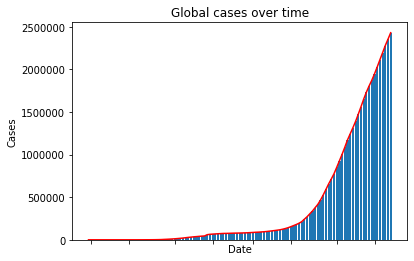

In [208]:
#Global cases

fig = plt.figure()
ax = plt.axes()

#ax.plot(x, np.sin(x));
#data
groupby_global = df.groupby('date').sum()
x = groupby_global.index
y = groupby_global.total_cases

#plot
ax.plot(x,y,c='r')
ax.bar(x,y)
ax.tick_params(axis='x',which='both',labelbottom=False)
ax.set_title('Global cases over time')
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

#save figure
plt.savefig('/Users/sebastiangraff/Desktop/Data_Analysis/COVID19-Exploration/plot_images/global_cases.png')
plt.show();

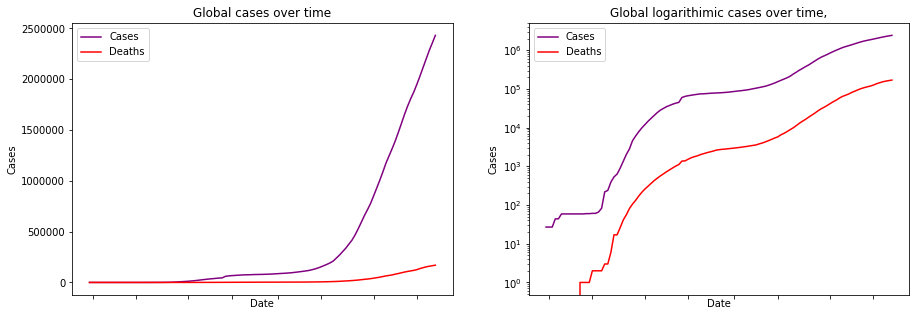

In [209]:
#Global cases vs deaths
fig, ax = plt.subplots(figsize = (15,5),nrows=1,ncols=2)

#data
groupby_global = df.groupby('date').sum()
x = groupby_global.index
y1 = groupby_global.total_cases
y2 = groupby_global.total_deaths

#plot
ax[0].plot(x,y1,c='purple',label='Cases')
ax[0].plot(x,y2,c='red',label='Deaths')
ax[0].tick_params(axis='x',which='both',labelbottom=False)
ax[0].set_title('Global cases over time')
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Cases")

ax[1].plot(x,y1,c='purple',label='Cases')
ax[1].plot(x,y2,c='red',label='Deaths')
ax[1].tick_params(axis='x',which='both',labelbottom=False)
ax[1].set_title('Global logarithimic cases over time,')
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Cases")
ax[1].set_yscale('log')

#save figure
ax[0].legend()
ax[1].legend()
plt.savefig('/Users/sebastiangraff/Desktop/Data_Analysis/COVID19-Exploration/plot_images/global_cases_vs_deaths.png')
plt.show();

In [210]:
groupby_global = df.groupby('date').sum()
groupby_global

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand
date,,,,,,,,,,,,
2019-12-31,27,27,0,0,0.019,0.019,0.000,0.000,0.0,0.0,0.000,0.000
2020-01-01,27,0,0,0,0.019,0.000,0.000,0.000,0.0,0.0,0.000,0.000
2020-01-02,27,0,0,0,0.019,0.000,0.000,0.000,0.0,0.0,0.000,0.000
2020-01-03,44,17,0,0,0.031,0.012,0.000,0.000,0.0,0.0,0.000,0.000
2020-01-04,44,0,0,0,0.031,0.000,0.000,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-17,2113573,84339,144820,8507,130431.327,4264.388,5640.059,254.871,13409298.0,651589.0,668.010,27.842
2020-04-18,2196897,83324,153083,8263,133477.548,3046.219,5871.547,231.486,14259188.0,655279.0,701.770,27.698
2020-04-19,2281018,84121,159504,6421,136797.443,3319.896,6059.976,188.430,15132800.0,679329.0,731.694,23.597


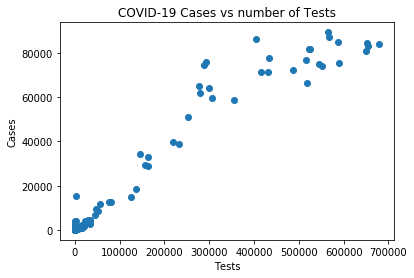

In [211]:
#Global cases vs tests

#data
groupby_global = df.groupby('date').sum()
x = groupby_global.new_tests
y = groupby_global.new_cases

plt.scatter(x,y)
plt.title("COVID-19 Cases vs number of Tests")
plt.xlabel("Tests")
plt.ylabel("Cases")

plt.savefig('/Users/sebastiangraff/Desktop/Data_Analysis/COVID19-Exploration/plot_images/global_tests_vs_cases.png')
plt.show();

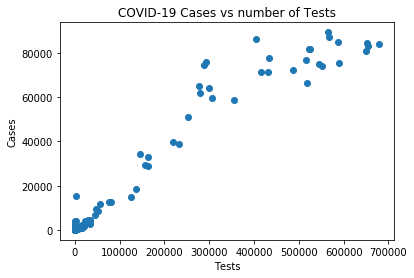

In [212]:
#Global cases vs tests

#data
groupby_global = df.groupby('date').sum()
x = groupby_global.new_tests
y = groupby_global.new_cases

plt.scatter(x,y)
plt.title("COVID-19 Cases vs number of Tests")
plt.xlabel("Tests")
plt.ylabel("Cases")

plt.savefig('/Users/sebastiangraff/Desktop/Data_Analysis/COVID19-Exploration/plot_images/cases_by_country.png')
plt.show();

In [216]:
#Use the preloaded world dataframe to get geodata for maps
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [302]:
df_test = df.set_index('iso_code')
world_test = world.set_index('iso_a3')
world_test_geo = world_test.geometry
result_test = world_test.join(df_test, lsuffix = '_other')

In [303]:
result_test = result_test.reset_index()

In [304]:
result_test = result_test.drop(['index', 'pop_est', 'continent_other', 'name', 'gdp_md_est'],axis=1)

In [337]:
test_test = result_test.groupby('location').sum()
test_test.tail(10)

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand
location,,,,,,,,,,,,
United Arab Emirates,79579.0,7265.0,453.0,43.0,8046.087,734.552,45.802,4.344,0.0,0.0,0.000,0.000
United Kingdom,1673695.0,124743.0,196153.0,16509.0,24654.491,1837.535,2889.446,243.188,7581092.0,397639.0,112.587,5.904
United States,11248401.0,787752.0,445887.0,42539.0,33982.805,2379.896,1347.078,128.513,58479055.0,4001162.0,176.447,12.072
Uruguay,12655.0,602.0,145.0,10.0,3643.058,173.302,41.743,2.880,176753.0,9900.0,50.581,2.834
Uzbekistan,17691.0,1657.0,72.0,5.0,528.572,49.509,2.157,0.150,0.0,0.0,0.000,0.000
Venezuela,4946.0,256.0,157.0,9.0,173.942,9.005,5.529,0.315,0.0,0.0,0.000,0.000
Vietnam,8215.0,276.0,0.0,0.0,84.392,2.831,0.000,0.000,1718286.0,60777.0,17.470,0.617
Yemen,12.0,1.0,0.0,0.0,0.408,0.034,0.000,0.000,0.0,0.0,0.000,0.000
Zambia,1078.0,65.0,32.0,3.0,58.637,3.536,1.739,0.162,0.0,0.0,0.000,0.000


/Users/sebastiangraff/opt/anaconda3/envs/COVID19/lib/python3.8/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


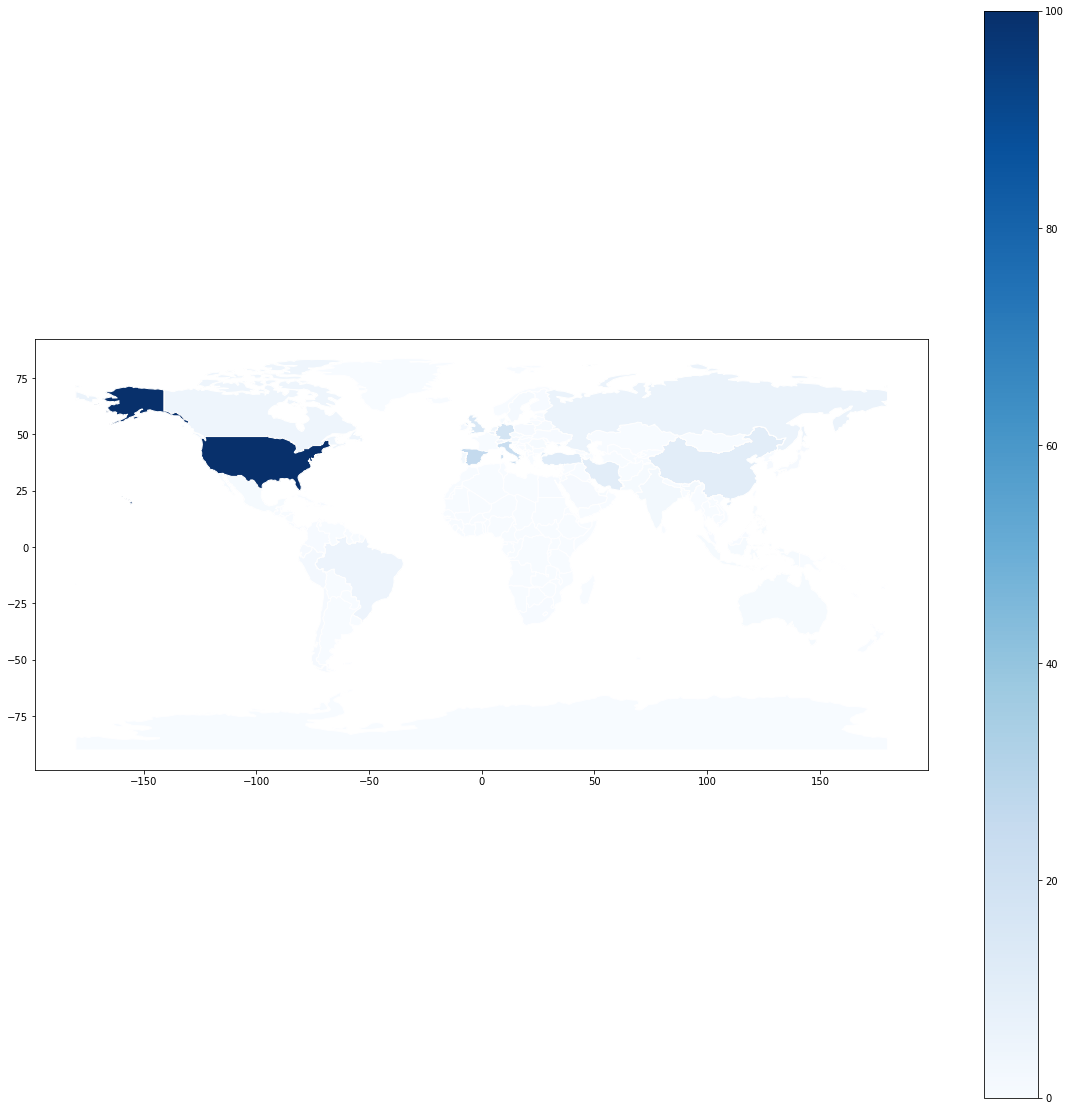

In [327]:
fig, ax = plt.subplots(1, figsize=(20,20))
variable = 'total_cases'

result_test.plot(column=variable, cmap='Blues', ax=ax,linewidth=1, edgecolor='white')

vmax = 100
vmin = 0

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show();

In [339]:
#stream directy from github
import requests
test_df = requests.get('https://covid.ourworldindata.org/data/owid-covid-data.csv')
json.loads()

In [22]:
#Stacked plot by continents

#data
groupby_continent = df.groupby('continent').sum()
x=df.date
y=df.total_cases[df.continent ==]
 
# Basic stacked area chart.
plt.stackplot(x,y, labels=df.continent.unique())
plt.legend(loc='upper left')

SyntaxError: invalid syntax (<ipython-input-22-21c2d79ed883>, line 6)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1483 and the array at index 1 has size 3729

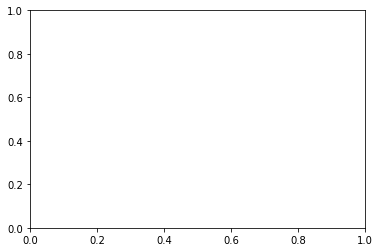

In [214]:
from collections import defaultdict

#Data
continent_dict=defaultdict(list)
for index, row in df.iterrows():
    continent_dict[row.continent].append(row.total_cases)

x=df.date
y1=continent_dict['North America']
y2=continent_dict['Asia']
y3=continent_dict['Africa']
y4=continent_dict['Europa']
y5=continent_dict['South America']
y6=continent_dict['Australia']
 
# Plot
plt.stackplot(continent_dict.keys(), y1,y2, labels=continent_dict.keys())
plt.legend(loc='upper left')
plt.show();

#np.array(d.keys(),dtype=float)